In [8]:
# read in data and remove missing values
import pandas as pd
df = pd.read_csv("cleaned_movies.csv")

In [9]:
# summary statistics for the popularity
df['popularity'].describe()

count    9921.000000
mean       45.091279
std       103.260355
min        19.183000
25%        22.604000
50%        28.430000
75%        42.589000
max      4533.723000
Name: popularity, dtype: float64

In [10]:
# calculate average popularity for each genre
genre_popularity = df.groupby('primary_genre')['popularity'].mean().sort_values(ascending=False)
genre_popularity_df = genre_popularity.reset_index()
genre_popularity_df

,primary_genre,popularity
0,Science Fiction,75.508538
1,Animation,59.477974
2,Action,55.121699
3,Horror,50.866776
4,Fantasy,46.104803
5,Adventure,45.243486
6,Romance,43.769428
7,Family,39.703430
8,Thriller,39.452924
9,Drama,39.290669


In [11]:
# lets visualize that data now
# bar chart of average popularity by genre
import plotly.express as px
fig = px.bar(genre_popularity, 
             x=genre_popularity.index, 
             y=genre_popularity.values, 
             labels={'x': 'Genre', 'y': 'Average Popularity'},
             title='Average Popularity by Genre',
             color_discrete_sequence=['#008080'])
fig.update_layout(
    xaxis_tickangle=45
)
fig.show()

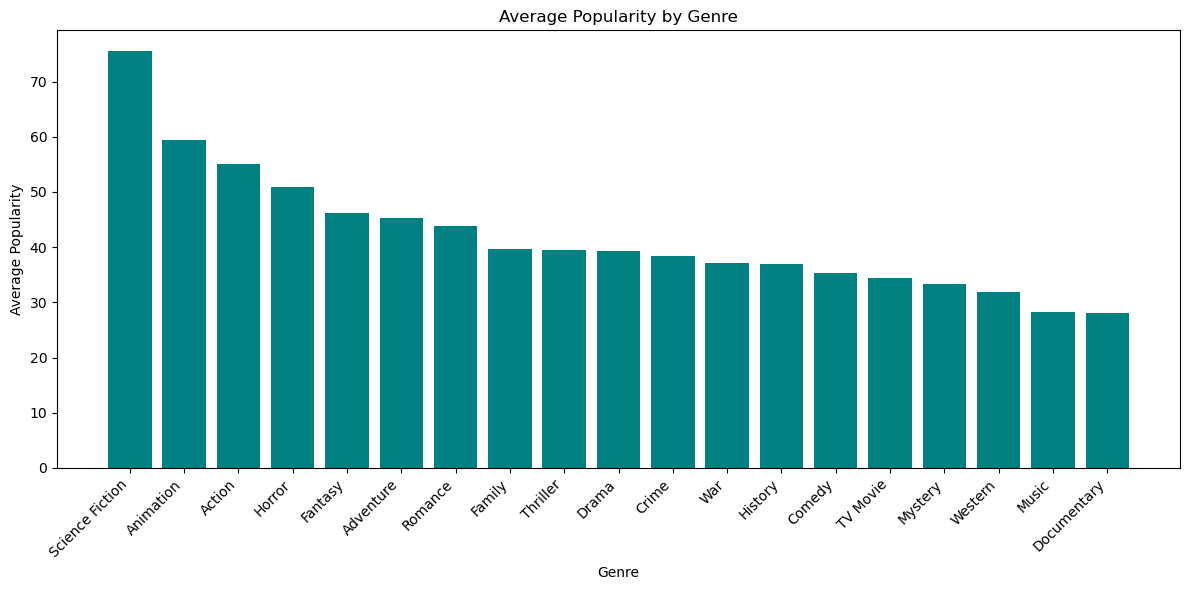

In [12]:
# non-interactive plot of average popularity by genre
import matplotlib.pyplot as plt
genre_pop_avg = df.groupby('primary_genre')['popularity'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(genre_pop_avg.index, genre_pop_avg.values, color='teal')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
# most popular genres by year selected

import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact

# Convert 'release_date' to datetime and extract the year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')  # Coerce will handle invalid dates
df['year'] = df['release_date'].dt.year  # Extract the year from release_date

# Function to update the plot based on year selection
def update_genre_plot(year):
    # Filter the dataframe for the selected year
    filtered_df = df[df['year'] == year]
    
    # Check if filtered_df is empty
    if filtered_df.empty:
        print(f"No data available for the year {year}.")
        return
    
    # Calculate the average popularity by genre for the selected year
    genre_popularity = filtered_df.groupby('primary_genre')['popularity'].mean().sort_values(ascending=False).head(5)
    
    # Create a bar chart
    fig = px.bar(genre_popularity, x=genre_popularity.index, y=genre_popularity.values,
                 labels={'x': 'Genre', 'y': 'Average Popularity'},
                 title=f'Most Popular Genres in {year}',
                 color_discrete_sequence=['#008080'])
    fig.show()

# Create an interactive widget for selecting the year
year_widget = widgets.IntSlider(min=df['year'].min(), max=df['year'].max(), step=1, value=df['year'].min(), 
                                 description="Select Year:")

# Link the widget to the update function
interact(update_genre_plot, year=year_widget)


interactive(children=(IntSlider(value=1902, description='Select Year:', max=2027, min=1902), Output()), _dom_c…

<function __main__.update_genre_plot(year)>

In [14]:
# most popular movies by genre selected

from ipywidgets import widgets
import plotly.express as px

# Function to plot the filtered bar chart based on genre and popularity
def plot_filtered_bar(genre_filter):
    # Filter the dataframe for the selected genre
    filtered_df = df[df['primary_genre'] == genre_filter]
    
    # Sort the filtered data by popularity (descending)
    sorted_df = filtered_df.sort_values(by='popularity', ascending=False)
    
    # Create a bar chart with the sorted data
    fig = px.bar(sorted_df.head(10), x='title', y='popularity', color='primary_genre', 
                 title=f"Top 10 Most Popular Movies in {genre_filter} Genre", 
                 labels={'popularity': 'Popularity', 'title': 'Movie Title'},
                 color_discrete_sequence=['#008080'])
    fig.show()

# Create an interactive widget to select genre
genre_widget = widgets.Dropdown(
    options=df['primary_genre'].unique(),
    description="Genre:",
    disabled=False
)

# Link the widget to the plot function
widgets.interactive(plot_filtered_bar, genre_filter=genre_widget)

interactive(children=(Dropdown(description='Genre:', options=('Science Fiction', 'Horror', 'Drama', 'Animation…